In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta
import numpy as np
import yfinance as yf

In [5]:

aapl_data = yf.download(tickers='AAPL',
                        start='2022-01-01',
                        end='2023-12-25')
                        
aapl_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953857,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669998,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943970,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056961,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100
...,...,...,...,...,...,...
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800


# Relative Strength Index

In [6]:

# Calculate the RSI in a new column in our DataFrame

aapl_data['rsi'] = ta.rsi(close=aapl_data['Adj Close'], length=14)


In [7]:
aapl_data.head()

,Open,High,Low,Close,Adj Close,Volume,rsi
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953857,104487900,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669998,99310400,NaN
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943970,94537600,NaN
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056961,96904000,NaN
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100,NaN


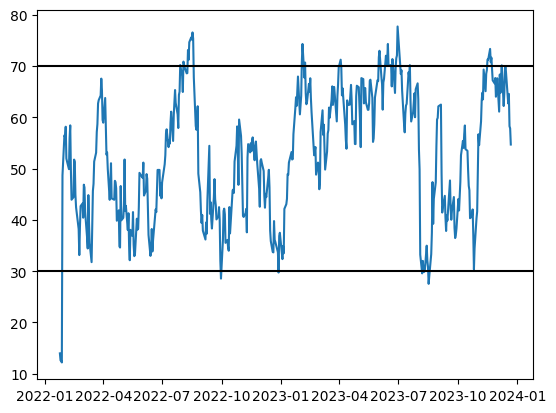

In [8]:
# Plotting the RSI

plt.plot(aapl_data['rsi'])


plt.axhline(y = 30, color = 'black', linestyle = '-')

plt.axhline(y = 70, color = 'black', linestyle = '-')


# Bolinger Bands

In [9]:
#https://www.investopedia.com/terms/b/bollingerbands.asp
bol_bands = ta.bbands(close=aapl_data['Adj Close'], length=20, std=2)


bol_bands

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
Date,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN,NaN,NaN
2022-01-06,NaN,NaN,NaN,NaN,NaN
2022-01-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-12-18,187.049162,192.834500,198.619838,6.000314,0.764073
2023-12-19,187.095982,193.109000,199.122019,6.227590,0.818559
2023-12-20,187.372577,193.318501,199.264424,6.151427,0.627104


In [11]:
# Create new column for the lower band values
aapl_data['lower_band'] = bol_bands.iloc[: , 0]


# Create new column for the mid band values
aapl_data['mid_band'] = bol_bands.iloc[: , 1]

# Create new column for the upper band values
aapl_data['upper_band'] = bol_bands.iloc[: , 2]

In [12]:
aapl_data

,Open,High,Low,Close,Adj Close,Volume,rsi,lower_band,mid_band,upper_band
Date,,,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953857,104487900,NaN,NaN,NaN,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669998,99310400,NaN,NaN,NaN,NaN
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943970,94537600,NaN,NaN,NaN,NaN
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056961,96904000,NaN,NaN,NaN,NaN
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900,62.680142,187.049162,192.834500,198.619838
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100,64.544456,187.095982,193.109000,199.122019
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800,58.247469,187.372577,193.318501,199.264424


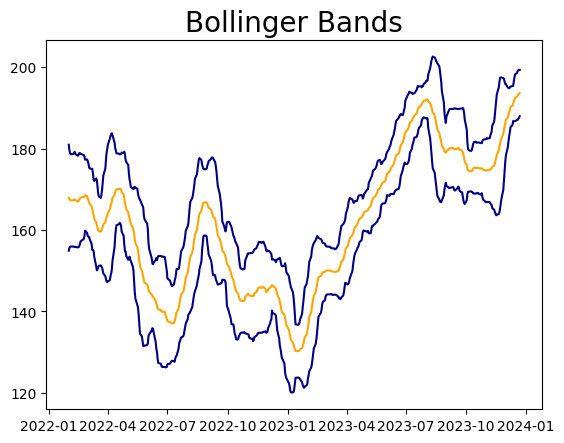

In [13]:
# Plotting

plt.plot(aapl_data['lower_band'], color='navy')

plt.plot(aapl_data['mid_band'], color='orange')

plt.plot(aapl_data['upper_band'], color='navy')

plt.title('Bollinger Bands', fontsize = 20)

plt.show()

In [23]:
# Japanese Candles
# https://pypi.org/project/mplfinance/

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

price = aapl_data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
#Change the column names to match mplfinance requirements
price.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
datetime = aapl_data.index
# price

price.reset_index(inplace=True)

price['Date'] = price['Date'].apply(mdates.date2num)
price


/var/folders/zb/rfmnsj3x0wj3w394c2h_dwhw0000gn/T/ipykernel_11224/240855778.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Date'] = price['Date'].apply(mdates.date2num)


,Date,Open,High,Low,Close,Volume
0,18995.0,177.830002,182.880005,177.710007,179.953857,104487900
1,18996.0,182.630005,182.940002,179.119995,177.669998,99310400
2,18997.0,179.610001,180.169998,174.639999,172.943970,94537600
3,18998.0,172.699997,175.300003,171.639999,170.056961,96904000
4,18999.0,172.889999,174.139999,171.029999,170.225052,86709100
...,...,...,...,...,...,...
492,19709.0,196.089996,196.630005,194.389999,195.889999,55751900
493,19710.0,196.160004,196.949997,195.889999,196.940002,40714100
494,19711.0,196.899994,197.679993,194.830002,194.830002,52242800
495,19712.0,196.100006,197.080002,193.500000,194.679993,46482500


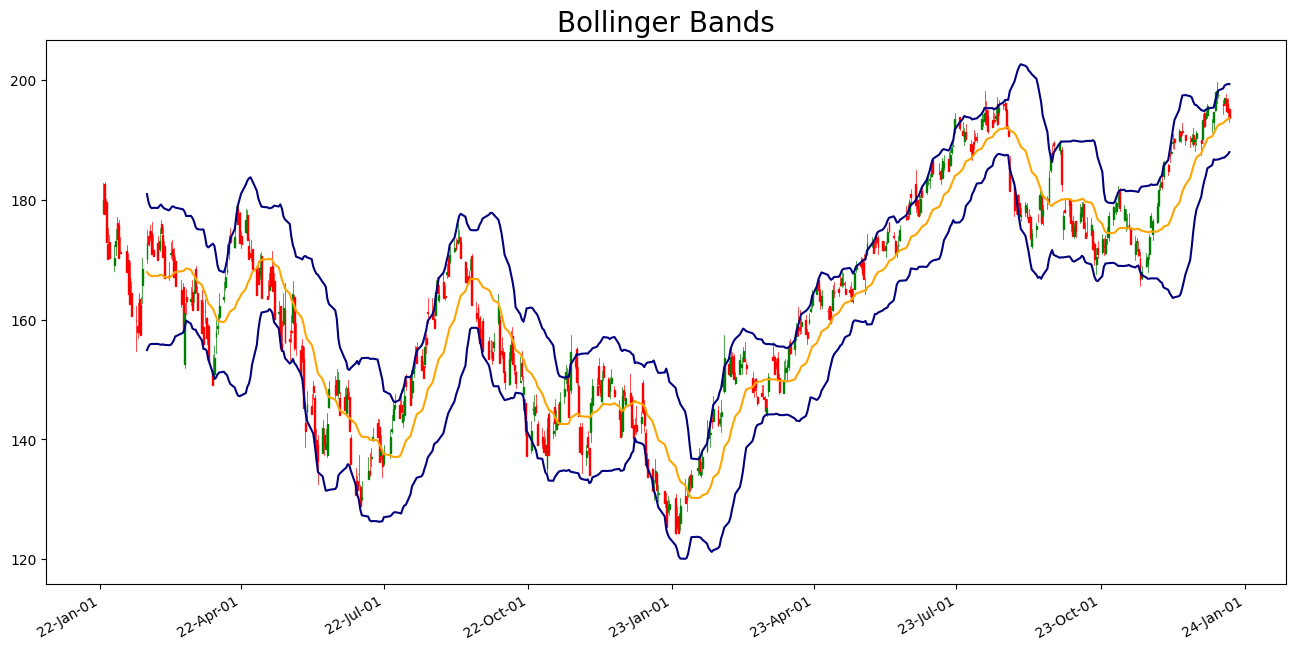

In [24]:
# Plotting the Candlestick graph 

# set the figsize
fig, ax = plt.subplots(figsize=(16,8))

candlestick_ohlc(ax, price.values, width=.6, colorup='green', colordown='red')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%b-%d'))

plt.gcf().autofmt_xdate()

plt.plot(aapl_data['lower_band'], color='navy')

plt.plot(aapl_data['mid_band'], color='orange')

plt.plot(aapl_data['upper_band'], color='navy')

plt.title('Bollinger Bands', fontsize = 20)

plt.show()

# Back Testing a Simple Strategy using RSI (Overbought (above 70) and Oversold (below 30))

In [25]:
aapl_data['signal'] = np.where(aapl_data['rsi'] < 30, 1, np.nan)

aapl_data['signal'] = np.where(aapl_data['rsi'] > 70, -1, aapl_data['signal'])

aapl_data['signal'] = aapl_data['signal'].ffill()

aapl_data = aapl_data.dropna()

aapl_data

,Open,High,Low,Close,Adj Close,Volume,rsi,lower_band,mid_band,upper_band,signal
Date,,,,,,,,,,,
2022-01-31,170.160004,175.000000,169.509995,174.779999,172.805573,115541600,56.469987,154.912724,167.942631,180.972537,1.0
2022-02-01,174.009995,174.839996,172.309998,174.610001,172.637482,86213900,56.119118,155.543625,167.576812,179.609999,1.0
2022-02-02,174.750000,175.880005,173.330002,175.839996,173.853607,84914300,58.145358,155.890033,167.385992,178.881952,1.0
2022-02-03,174.479996,176.240005,172.119995,172.899994,170.946808,89418100,51.968379,155.951459,167.286134,178.620809,1.0
2022-02-04,171.679993,174.100006,170.679993,172.389999,170.659714,82465400,51.387729,155.949129,167.316272,178.683415,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900,62.680142,187.049162,192.834500,198.619838,-1.0
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100,64.544456,187.095982,193.109000,199.122019,-1.0
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800,58.247469,187.372577,193.318501,199.264424,-1.0


In [26]:
# Normal returns
aapl_data['aapl_return'] = aapl_data['Adj Close'].pct_change()

# Log returns
aapl_data['aapl_log_return'] = np.log(aapl_data['Adj Close'] / aapl_data['Adj Close'].shift(1))

aapl_data

/var/folders/zb/rfmnsj3x0wj3w394c2h_dwhw0000gn/T/ipykernel_11224/500480490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['aapl_return'] = aapl_data['Adj Close'].pct_change()
/var/folders/zb/rfmnsj3x0wj3w394c2h_dwhw0000gn/T/ipykernel_11224/500480490.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['aapl_log_return'] = np.log(aapl_data['Adj Close'] / aapl_data['Adj Close'].shift(1))


,Open,High,Low,Close,Adj Close,Volume,rsi,lower_band,mid_band,upper_band,signal,aapl_return,aapl_log_return
Date,,,,,,,,,,,,,
2022-01-31,170.160004,175.000000,169.509995,174.779999,172.805573,115541600,56.469987,154.912724,167.942631,180.972537,1.0,NaN,NaN
2022-02-01,174.009995,174.839996,172.309998,174.610001,172.637482,86213900,56.119118,155.543625,167.576812,179.609999,1.0,-0.000973,-0.000973
2022-02-02,174.750000,175.880005,173.330002,175.839996,173.853607,84914300,58.145358,155.890033,167.385992,178.881952,1.0,0.007044,0.007020
2022-02-03,174.479996,176.240005,172.119995,172.899994,170.946808,89418100,51.968379,155.951459,167.286134,178.620809,1.0,-0.016720,-0.016861
2022-02-04,171.679993,174.100006,170.679993,172.389999,170.659714,82465400,51.387729,155.949129,167.316272,178.683415,1.0,-0.001679,-0.001681
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900,62.680142,187.049162,192.834500,198.619838,-1.0,-0.008503,-0.008540
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100,64.544456,187.095982,193.109000,199.122019,-1.0,0.005360,0.005346
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800,58.247469,187.372577,193.318501,199.264424,-1.0,-0.010714,-0.010772


In [28]:
# Vectorized backtest

aapl_data['strategy_return'] = (aapl_data['signal'] * aapl_data['aapl_log_return'])
aapl_data

/var/folders/zb/rfmnsj3x0wj3w394c2h_dwhw0000gn/T/ipykernel_11224/3308260816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['strategy_return'] = (aapl_data['signal'] * aapl_data['aapl_log_return'])


,Open,High,Low,Close,Adj Close,Volume,rsi,lower_band,mid_band,upper_band,signal,aapl_return,aapl_log_return,strategy_return
Date,,,,,,,,,,,,,,
2022-01-31,170.160004,175.000000,169.509995,174.779999,172.805573,115541600,56.469987,154.912724,167.942631,180.972537,1.0,NaN,NaN,NaN
2022-02-01,174.009995,174.839996,172.309998,174.610001,172.637482,86213900,56.119118,155.543625,167.576812,179.609999,1.0,-0.000973,-0.000973,-0.000973
2022-02-02,174.750000,175.880005,173.330002,175.839996,173.853607,84914300,58.145358,155.890033,167.385992,178.881952,1.0,0.007044,0.007020,0.007020
2022-02-03,174.479996,176.240005,172.119995,172.899994,170.946808,89418100,51.968379,155.951459,167.286134,178.620809,1.0,-0.016720,-0.016861,-0.016861
2022-02-04,171.679993,174.100006,170.679993,172.389999,170.659714,82465400,51.387729,155.949129,167.316272,178.683415,1.0,-0.001679,-0.001681,-0.001681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900,62.680142,187.049162,192.834500,198.619838,-1.0,-0.008503,-0.008540,0.008540
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100,64.544456,187.095982,193.109000,199.122019,-1.0,0.005360,0.005346,-0.005346
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800,58.247469,187.372577,193.318501,199.264424,-1.0,-0.010714,-0.010772,0.010772


<Axes: xlabel='Date'>

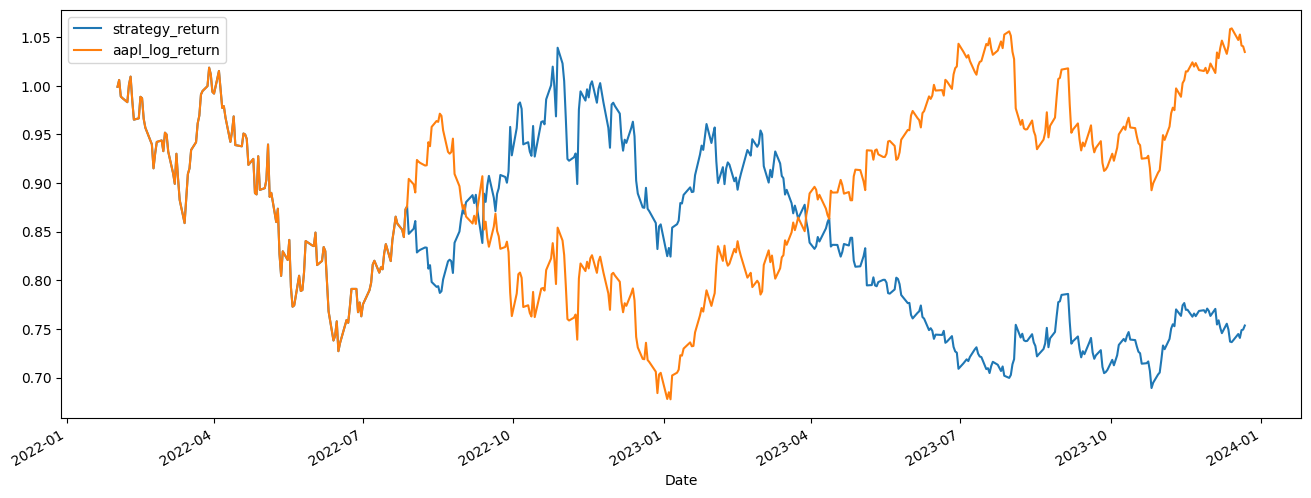

In [29]:
portfolios_cummulative_return = np.exp(np.log1p(aapl_data[['strategy_return', 'aapl_log_return']]).cumsum())


portfolios_cummulative_return.plot(figsize=(16,6))

# Sharpe Ratio

In [31]:
# Assume a risk-free rate of 0.03

risk_free_rate = 0.03

# Calculate Sharpe ratio
sharpe_ratio = (aapl_data['strategy_return'].mean() - risk_free_rate) / aapl_data['strategy_return'].std()

print('Sharpe Ratio: ', sharpe_ratio)

Sharpe Ratio:  -1.6670485437376727


Since the Sharpe ratio is negative, this strategy is not good. We want the sharpe ratio to be positive, and yield more returns than risk-free rate of 3%

# Maximum Drawdown

In [32]:
# Maximum Drawdown

(aapl_data[['strategy_return', 'aapl_log_return']].cumsum().min()) * 100

strategy_return   -29.471261
aapl_log_return   -32.926735
dtype: float64

we can see that maximum drawdown is negative for both the returns. Not this strategy is not good

# Annual Volatility

In [33]:
# Annual Volatility

annual_volatility = (np.sqrt(252) * aapl_data['strategy_return'].std()) * 100

print(f'Annual volatility: {round(annual_volatility,2)}%')

Annual volatility: 28.97%


# Comparing with SP500

In [35]:
# Downloading SPY Data

spy = yf.download('SPY', start='2022-01-01', end='2023-12-25')
spy

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,476.299988,477.850006,473.850006,477.709991,463.046021,72668200
2022-01-04,479.220001,479.980011,475.579987,477.549988,462.890930,71178700
2022-01-05,477.160004,477.980011,468.279999,468.380005,454.002411,104538900
2022-01-06,467.890015,470.820007,465.429993,467.940002,453.575897,86858900
2022-01-07,467.950012,469.200012,464.649994,466.089996,451.782684,85111600
...,...,...,...,...,...,...
2023-12-18,470.980011,472.980011,469.890015,471.970001,471.970001,70375300
2023-12-19,472.529999,474.920013,472.450012,474.839996,474.839996,55761800
2023-12-20,473.959991,475.899994,467.820007,468.260010,468.260010,102921000


In [36]:
# Calculating SPY Returns

spy['spy_return'] = np.log(spy['Adj Close'] / spy['Adj Close'].shift(1))
spy

,Open,High,Low,Close,Adj Close,Volume,spy_return
Date,,,,,,,
2022-01-03,476.299988,477.850006,473.850006,477.709991,463.046021,72668200,NaN
2022-01-04,479.220001,479.980011,475.579987,477.549988,462.890930,71178700,-0.000335
2022-01-05,477.160004,477.980011,468.279999,468.380005,454.002411,104538900,-0.019389
2022-01-06,467.890015,470.820007,465.429993,467.940002,453.575897,86858900,-0.000940
2022-01-07,467.950012,469.200012,464.649994,466.089996,451.782684,85111600,-0.003961
...,...,...,...,...,...,...,...
2023-12-18,470.980011,472.980011,469.890015,471.970001,471.970001,70375300,0.005609
2023-12-19,472.529999,474.920013,472.450012,474.839996,474.839996,55761800,0.006062
2023-12-20,473.959991,475.899994,467.820007,468.260010,468.260010,102921000,-0.013954


In [37]:
# Merging all three together

final_df = spy[['spy_return']].merge(aapl_data[['strategy_return',
                                                'aapl_log_return']],
                                     left_index = True,
                                     right_index = True)
final_df

,spy_return,strategy_return,aapl_log_return
Date,,,
2022-01-31,0.017851,NaN,NaN
2022-02-01,0.006734,-0.000973,-0.000973
2022-02-02,0.009667,0.007020,0.007020
2022-02-03,-0.023786,-0.016861,-0.016861
2022-02-04,0.004691,-0.001681,-0.001681
...,...,...,...
2023-12-18,0.005609,0.008540,-0.008540
2023-12-19,0.006062,-0.005346,0.005346
2023-12-20,-0.013954,0.010772,-0.010772


In [38]:
# Getting the yearly return for all three

(final_df.cumsum().iloc[-1 : ]) * 100

,spy_return,strategy_return,aapl_log_return
Date,,,
2023-12-22,10.044936,-20.353493,11.36271
